# Homework, Week 18, Heather Leighton-Dick

## 1.	What is a neural network? What are the general steps required to build a neural network?

### A neural network is a deep learning model that consists of three parts: input, hidden layers, and output. Based on the input, the model learns from following the connections between nodes of information and assigning weights to those connections. Neural networks are especially good at drawing predictions from large and complex datasets.

### The general steps required to build a neural network are:

### 1. define the model: inputs, layer by hidden layer, and output
### 2. split data into training and test portions
### 3. run the model on the training portion and adjust arguments and parameters as it iterates through epochs
### 4. run the model with best performing arguments on the test data and check performance


## 2.	Generally, how do you check the performance of a neural network? Why?

### The performance of a neural network can be checked via accuracy on classification reports and via RMSE and MAE calculations. You would run these metrics on the test portion of your dataset; the training set could be checked for comparison but wouldn't be the final word on how the model performed.

### RMSE and MAE check the distances between values and predicted values; when the distance is smaller, the model is performing better.

In [184]:
#imports
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

import keras
from keras.layers import Dense
from keras.models import Sequential
from keras.utils.np_utils import to_categorical
from tensorflow.python import tf2
import tensorflow as tf

import torch
import torch.nn as nn
import torch.nn.functional as F

In [189]:
#importing, checking column dtypes, turning "Sex" column into 3
abalone_df = pd.read_csv("../Homework17/abalone.csv", delimiter=',')
abalone_df.columns = abalone_df.columns.str.replace(' ', '')
abalone_dfc = pd.get_dummies(abalone_df, columns=["Sex"], prefix=['status'])
print(abalone_dfc.head())

#train test split
X = abalone_dfc.drop("Rings", axis = 1)   #Feature Matrix
y = abalone_dfc["Rings"] #Dependent Variable

# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=42)

   Length  Diameter  Height  WholeWeight  ShuckedWeight  VisceraWeight  \
0   0.455     0.365   0.095       0.5140         0.2245         0.1010   
1   0.350     0.265   0.090       0.2255         0.0995         0.0485   
2   0.530     0.420   0.135       0.6770         0.2565         0.1415   
3   0.440     0.365   0.125       0.5160         0.2155         0.1140   
4   0.330     0.255   0.080       0.2050         0.0895         0.0395   

   ShellWeight  Rings  status_F  status_I  status_M  
0        0.150     15         0         0         1  
1        0.070      7         0         0         1  
2        0.210      9         1         0         0  
3        0.155     10         0         0         1  
4        0.055      7         0         1         0  


In [91]:
print(X_train.head())

      Length  Diameter  Height  WholeWeight  ShuckedWeight  VisceraWeight  \
3823   0.615     0.455   0.135       1.0590         0.4735         0.2630   
3956   0.515     0.395   0.140       0.6860         0.2810         0.1255   
3623   0.660     0.530   0.175       1.5830         0.7395         0.3505   
0      0.455     0.365   0.095       0.5140         0.2245         0.1010   
2183   0.495     0.400   0.155       0.8085         0.2345         0.1155   

      ShellWeight  status_F  status_I  status_M  
3823        0.274         1         0         0  
3956        0.220         1         0         0  
3623        0.405         0         0         1  
0           0.150         0         0         1  
2183        0.350         0         0         1  


## 3.	Create a neural network using keras to predict the outcome of either of these datasets: 
Cardiac Arrhythmia: https://archive.ics.uci.edu/ml/datasets/Arrhythmia 
Abalone age: https://archive.ics.uci.edu/ml/datasets/Abalone


In [190]:
n_cols = X.shape[1]

#specify model -- connections go between sequential hidden layers
model = Sequential()
model.add(Dense(10, activation='relu', input_shape = (n_cols, )))
model.add(Dense(10, activation='relu'))
model.add(Dense(1))

#compile
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_squared_error'])

#print MSE loss result
print("Loss function: " + model.loss)

#fit
model.fit(X_train, y_train, epochs=11)

Loss function: mean_squared_error
Epoch 1/11
22/98 [=====>........................] - ETA: 0s - loss: 104.8482 - mean_squared_error: 104.8482

2022-02-02 23:37:58.822050: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


98/98 [==============================] - 1s 4ms/step - loss: 99.4570 - mean_squared_error: 99.4570
Epoch 2/11
98/98 [==============================] - 0s 4ms/step - loss: 48.3932 - mean_squared_error: 48.3932
Epoch 3/11
98/98 [==============================] - 0s 4ms/step - loss: 9.8858 - mean_squared_error: 9.8858
Epoch 4/11
98/98 [==============================] - 0s 4ms/step - loss: 8.2281 - mean_squared_error: 8.2281
Epoch 5/11
98/98 [==============================] - 0s 4ms/step - loss: 7.8395 - mean_squared_error: 7.8395
Epoch 6/11
98/98 [==============================] - 0s 4ms/step - loss: 7.5407 - mean_squared_error: 7.5407
Epoch 7/11
98/98 [==============================] - 0s 4ms/step - loss: 7.1272 - mean_squared_error: 7.1272
Epoch 8/11
98/98 [==============================] - 0s 4ms/step - loss: 6.7698 - mean_squared_error: 6.7698
Epoch 9/11
98/98 [==============================] - 0s 4ms/step - loss: 6.5627 - mean_squared_error: 6.5627
Epoch 10/11
98/98 [================

In [191]:
#running the model, comparing RMSEs
pred_train= model.predict(X_train)
print('RMSE training: ' + str(np.sqrt(mean_squared_error(y_train,pred_train))))

pred= model.predict(X_test)
print('RMSE test: ' + str(np.sqrt(mean_squared_error(y_test,pred))))

RMSE training: 2.5071929511091127
RMSE test: 2.411200733920112


2022-02-02 23:38:12.608551: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


## 4.	Write another algorithm to predict the same result as the previous question using either KNN or logistic regression.

In [88]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RidgeCV, LassoCV
from sklearn.neighbors import KNeighborsRegressor
import matplotlib.pyplot as plt
from sklearn import neighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn import datasets

estimators = [('ridge', RidgeCV()),
              ('lasso', LassoCV(random_state=42)),
             ('knr', KNeighborsRegressor(n_neighbors=20,
                                          metric='euclidean'))]

# Create and fit the model
knr = KNeighborsRegressor()
knr.fit(X_train, y_train)

#running the model, comparing RMSEs
pred_knr_train = model.predict(X_train)
print('RMSE training: ' + str(np.sqrt(mean_squared_error(y_train,pred_knr_train))))

pred_knr_test = knr.predict(X_test)
print('RMSE test: ' + str(np.sqrt(mean_squared_error(y_test,pred_knr))))

# Predict on the test features, print the results

print("Prediction for test: ", pred_knr)

print(knr.score(X_train, y_train))
print(knr.score(X_test, y_test))

#lr = LogisticRegression()
#lr.fit(X_train, y_train)
#print(lr.score(X_train, y_train))
#print(lr.score(X_test, y_test))
#print(np.sqrt(mean_squared_error(y_train,pred_train)))




RMSE training: 2.7596750220682256
RMSE test: 2.3001560171756354
Prediction for test:  [10.2  8.2 14.  ... 13.  11.8  9.2]
0.6733093801625137
0.5229422161644626


## 5.	Create a neural network using pytorch to predict the same result as question 3. 

In [139]:
#create tensors => matrices
X_t_train = torch.FloatTensor(X_train.values)
X_t_test = torch.FloatTensor(X_test.values)

y_t_train = torch.FloatTensor(y_train.values)
y_t_test = torch.FloatTensor(y_test.values)

print(X_t_train.shape)
print(X_t_test.shape)
print(y_t_train.shape)
print(y_t_test.shape)

torch.Size([3132, 10])
torch.Size([1045, 10])
torch.Size([3132])
torch.Size([1045])


In [166]:
#reshape target tensors
new_shape_train = (len(y_t_train), 1)
y_t_train = y_t_train.view(new_shape_train)
new_shape_test = (len(y_t_test), 1)
y_t_test = y_t_test.view(new_shape_test)

print(y_t_train.shape)
print(y_t_test.shape)

torch.Size([3132, 1])
torch.Size([1045, 1])


In [167]:
class ANN_Model(nn.Module):
    
    #uses the parameters for nn.Module, check documentation
    def __init__(self, input_features=10, hidden1=10,  hidden2=10, out_features=1):
        
        super().__init__() 
        
        self.layer_1_connection = nn.Linear(input_features, hidden1)
        self.layer_2_connection = nn.Linear(hidden1, hidden2)
        self.out = nn.Linear(hidden2, out_features)
        
    def forward(self, x):
        #apply activation functions
        x = x.view(x.size(0), -1)
        x = F.relu(self.layer_1_connection(x))
        x = F.relu(self.layer_2_connection(x))
        x = self.out(x)
        return x


In [174]:
torch.manual_seed(42)

#create instance of model, function, optimizer
ann = ANN_Model()

loss_function = torch.nn.MSELoss()

optimizer = torch.optim.Adam(ann.parameters(),lr=0.01)

In [180]:
y_t_pred = ann.forward(X_t_test)
y_t_pred.shape

torch.Size([1045, 1])

In [170]:
y_t_test.shape

torch.Size([1045, 1])

In [179]:
#run model through multiple epochs/iterations
final_loss = []
n_epochs = 15

for epoch in range(n_epochs):
    y_t_pred = ann.forward(X_t_train)
    
    loss = loss_function(y_t_pred, y_t_train)
    final_loss.append(loss)
    
    if epoch >= 1:
        print(f'Epoch number: {epoch} with loss: {loss}')
        
    optimizer.zero_grad()
    loss.backward() 
    optimizer.step()

Epoch number: 1 with loss: 8.01622200012207
Epoch number: 2 with loss: 7.658191204071045
Epoch number: 3 with loss: 7.755103588104248
Epoch number: 4 with loss: 8.034760475158691
Epoch number: 5 with loss: 8.056960105895996
Epoch number: 6 with loss: 7.838399887084961
Epoch number: 7 with loss: 7.603630542755127
Epoch number: 8 with loss: 7.515748500823975
Epoch number: 9 with loss: 7.578617095947266
Epoch number: 10 with loss: 7.669875621795654
Epoch number: 11 with loss: 7.6753129959106445
Epoch number: 12 with loss: 7.579638957977295
Epoch number: 13 with loss: 7.44720458984375
Epoch number: 14 with loss: 7.35756778717041


In [185]:
#trying to print the RMSE test
print('RMSE test: ' + str(tensor.detach().numpy(sqrt(mean_squared_error(y_t_test, y_t_pred)))))

AttributeError: module 'tensorflow' has no attribute 'detach'

In [165]:
#predictions
y_t_pred = []

with torch.no_grad(): #decreases memory consumption
    for i, data in enumerate(X_t_test):
        prediction = ann(data)
        y_t_pred.append(prediction) #returns index with max element in each prediction set

from sklearn.metrics import classification_report

print(classification_report(y_t_test, y_t_pred))

ValueError: Found input variables with inconsistent numbers of samples: [1045, 0]

## 6.	Compare the performance of the neural networks to the other model you created. Which performed better? Why do you think that is?

The keras method hovered around an RMSE of 2.4, while the logistic regression RMSE got as low as ~2.3. I was unable to get the RMSE function to work on the ANN_model, but the losses seem consistent across all three models at around 7. I used the Adam optimizer in the keras and ANN_model, so that might account for some of the fact that they had similar outcomes.

### Intro to Deep Learning certificate

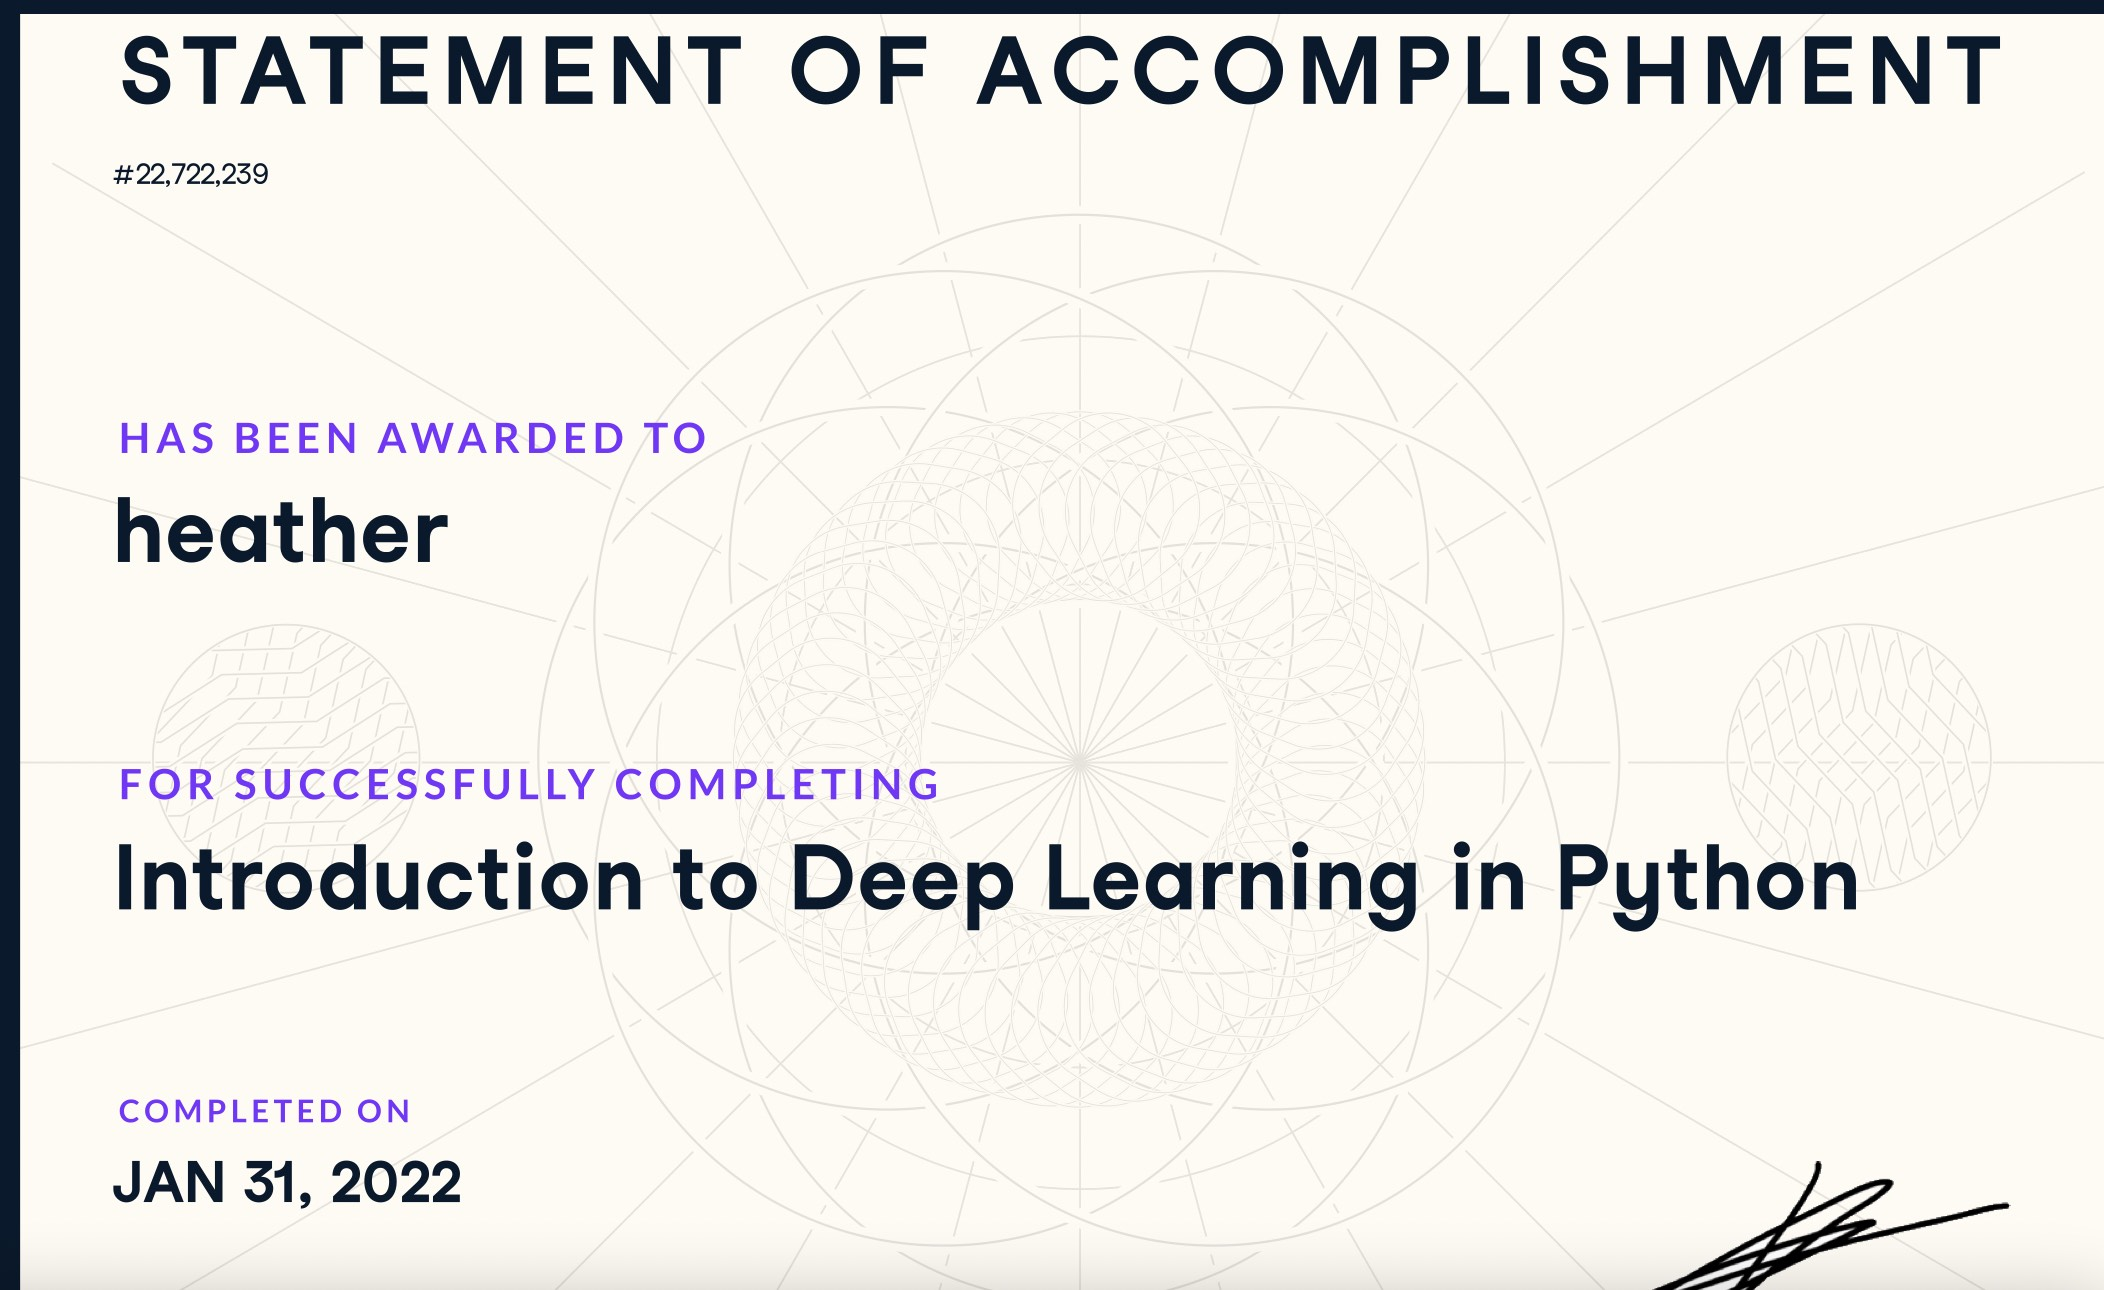